In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from research.datasets.crsp import CRSP

In [4]:
crsp = CRSP()

df = crsp.df.copy()

# Timeframe
start_date = "1990-01-01"
end_date = "2010-12-31"
df = df[df['date'] >= start_date]
df = df[df['date'] <= end_date]
df = df.reset_index(drop=True)

df

,permno,date,cusip,shrcd,exchcd,ticker,shrout,vol,prc,ret
0,10001,1990-01-31,36720410,11.0,3.0,GFGC,1022.0,353.0,9.9375,-0.018519
1,10001,1990-02-28,36720410,11.0,3.0,GFGC,1022.0,149.0,9.8750,-0.006289
2,10001,1990-03-30,36720410,11.0,3.0,GFGC,1027.0,127.0,9.8750,0.012658
3,10001,1990-04-30,36720410,11.0,3.0,GFGC,1027.0,166.0,9.8750,0.000000
4,10001,1990-05-31,36720410,11.0,3.0,GFGC,1027.0,279.0,9.7500,-0.012658
...,...,...,...,...,...,...,...,...,...,...
1448333,93436,2010-08-31,88160R10,11.0,3.0,TSLA,93198.0,153193.0,19.4800,-0.023069
1448334,93436,2010-09-30,88160R10,11.0,3.0,TSLA,93253.0,183742.0,20.4050,0.047485
1448335,93436,2010-10-29,88160R10,11.0,3.0,TSLA,93271.0,67145.0,21.8400,0.070326
1448336,93436,2010-11-30,88160R10,11.0,3.0,TSLA,93271.0,288315.0,35.3300,0.617674


In [5]:
df['logret'] = np.log1p(df['ret'])
num_features = 48

# Momentum features from t-i to t-2
for t in range(2, num_features+1):
    df[f'mom_{t}'] = df.groupby('permno')['logret'].rolling(t-1,t-1).sum().reset_index(drop=True)
    df[f'mom_{t}'] = df.groupby('permno')[f'mom_{t}'].shift(2)

df = df.dropna()

df

,permno,date,cusip,shrcd,exchcd,ticker,shrout,vol,prc,ret,...,mom_39,mom_40,mom_41,mom_42,mom_43,mom_44,mom_45,mom_46,mom_47,mom_48
48,10001,1994-01-31,36720410,11.0,3.0,EWST,1091.0,150.0,17.50000,-0.047619,...,0.701690,0.741669,0.690376,0.715693,0.729698,0.716959,0.716959,0.729538,0.723229,0.704536
49,10001,1994-02-28,36720410,11.0,3.0,EWST,1091.0,58.0,17.50000,0.000000,...,0.801850,0.788946,0.828925,0.777632,0.802950,0.816954,0.804215,0.804215,0.816794,0.810485
50,10001,1994-03-31,36720410,11.0,3.0,EWST,1091.0,133.0,17.25000,-0.004286,...,0.753060,0.753060,0.740156,0.780135,0.728842,0.754159,0.768164,0.755425,0.755425,0.768004
51,10001,1994-04-29,36720410,11.0,3.0,EWST,1091.0,102.0,14.75000,-0.144928,...,0.751762,0.753060,0.753060,0.740156,0.780135,0.728842,0.754159,0.768164,0.755425,0.755425
52,10001,1994-05-31,36720410,11.0,3.0,EWST,1091.0,146.0,15.75000,0.067797,...,0.734394,0.747466,0.748765,0.748765,0.735861,0.775840,0.724546,0.749864,0.763869,0.751130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447998,93316,1999-10-29,98960110,11.0,3.0,ZING,3082.0,185.0,6.87500,-0.035088,...,-0.110075,-0.207714,-0.416805,-0.057431,-0.030032,-0.190118,-0.110075,-0.524051,-0.397757,-0.777246
1447999,93316,1999-11-30,98960110,11.0,3.0,ZING,3082.0,811.0,8.50000,0.236364,...,-0.293858,-0.293858,-0.391496,-0.600587,-0.241214,-0.213814,-0.373900,-0.293857,-0.707833,-0.581540
1448000,93316,1999-12-31,98960110,11.0,3.0,ZING,3082.0,1712.0,12.87500,0.514706,...,-0.354894,-0.329576,-0.329576,-0.427214,-0.636306,-0.276932,-0.249533,-0.409618,-0.329576,-0.743551
1448001,93316,2000-01-31,98960110,11.0,3.0,ZING,3082.0,3276.0,15.12500,0.174757,...,-0.078180,-0.142719,-0.117401,-0.117401,-0.215039,-0.424131,-0.064757,-0.037358,-0.197443,-0.117401


In [6]:
momentum_vars = [f'mom_{i}' for i in range(2, num_features+1)]
regression_formula = f"ret ~ {' + '.join(momentum_vars)}"

In [7]:
coefficients = []

# Group by each date to run a cross-sectional regression
for date, group in df.groupby('date'):
    model = smf.ols(formula=regression_formula, data=group).fit()
    
    # Save the coefficients
    coefficients.append(model.params)

# Convert coefficients into a DataFrame
coef_df = pd.DataFrame(coefficients, index=df['date'].unique())

coef_df

,Intercept,mom_2,mom_3,mom_4,mom_5,mom_6,mom_7,mom_8,mom_9,mom_10,...,mom_39,mom_40,mom_41,mom_42,mom_43,mom_44,mom_45,mom_46,mom_47,mom_48
1994-01-31,-0.016304,0.000260,-0.001829,-0.001829,-0.001430,-0.000555,0.000072,-0.000388,-0.000497,-0.000343,...,-0.006592,-0.007548,-0.007672,-0.008805,-0.009939,-0.008624,-0.009112,-0.010642,-0.012172,-0.011389
1994-02-28,0.021967,0.012267,0.003145,-0.014580,-0.014652,0.004934,0.026317,0.030313,0.018364,0.002201,...,-0.043559,-0.056290,-0.051536,-0.015470,0.009792,0.004836,0.006767,0.012702,0.027072,0.012522
1994-03-31,-0.030670,0.024366,0.010324,0.012539,-0.019841,-0.008407,-0.000043,0.012752,0.020630,0.016834,...,-0.008140,-0.018645,-0.023309,-0.030887,-0.011557,-0.003791,-0.012737,-0.004305,-0.003137,-0.007809
1994-04-29,0.034990,0.012611,-0.010167,-0.027666,-0.040399,-0.004144,-0.019473,-0.011318,-0.008572,0.008738,...,0.015711,-0.000816,-0.003807,0.006872,0.003987,-0.002369,0.004102,0.010404,0.007688,0.012771
1994-05-31,0.017695,0.067066,-0.049995,-0.012652,-0.066149,-0.006921,-0.003957,-0.003132,0.005516,0.043346,...,0.088366,-0.010919,0.016928,0.022045,0.048609,0.044044,0.086231,0.001085,-0.143318,-0.016465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993-09-30,-0.029734,0.048203,0.122823,-0.038236,-0.012150,0.017447,0.033142,-0.057003,-0.005278,0.035156,...,-0.016910,0.076462,-0.006907,-0.033926,-0.022022,0.006868,-0.006777,0.033835,0.021726,-0.017276
1993-10-29,0.050341,0.096996,-0.022025,-0.069682,0.000968,-0.057970,0.071103,-0.069691,0.013431,0.027203,...,0.037417,0.002926,-0.030185,0.013606,0.062327,0.031663,-0.089061,-0.016278,0.037960,-0.001966
1993-05-28,0.035570,-0.001346,0.016093,0.003561,0.031283,0.031372,-0.071296,0.032170,-0.023085,0.022149,...,-0.071571,0.042989,0.038861,-0.064742,0.054700,-0.023450,0.060993,-0.018055,-0.060310,0.048496
1993-06-30,0.014013,0.109761,-0.039853,-0.028416,0.067002,0.022317,-0.038796,0.053085,-0.011850,-0.072141,...,0.019598,-0.054231,-0.021509,0.036872,0.084412,-0.134417,0.070813,-0.052568,0.009582,0.025817


In [8]:
# Fama-MacBeth estimates
fama_macbeth_estimates = coef_df.mean()
fama_macbeth_std_errors = coef_df.std() / np.sqrt(len(coef_df))

# Display Fama-MacBeth estimates with standard errors
fama_macbeth_summary = pd.DataFrame({
    'coef': fama_macbeth_estimates,
    'std_error': fama_macbeth_std_errors,
    't_stat': fama_macbeth_estimates / fama_macbeth_std_errors
})

fama_macbeth_summary

,coef,std_error,t_stat
Intercept,0.008935,0.002335,3.826885
mom_2,-0.008014,0.003988,-2.009627
mom_3,0.007484,0.003815,1.961851
mom_4,-0.005658,0.003864,-1.464463
mom_5,-0.007572,0.003928,-1.927609
mom_6,0.004111,0.004692,0.876157
mom_7,0.000560,0.004063,0.137732
mom_8,0.000545,0.003494,0.156014
mom_9,0.005276,0.004129,1.277827
mom_10,-0.002889,0.004117,-0.701792


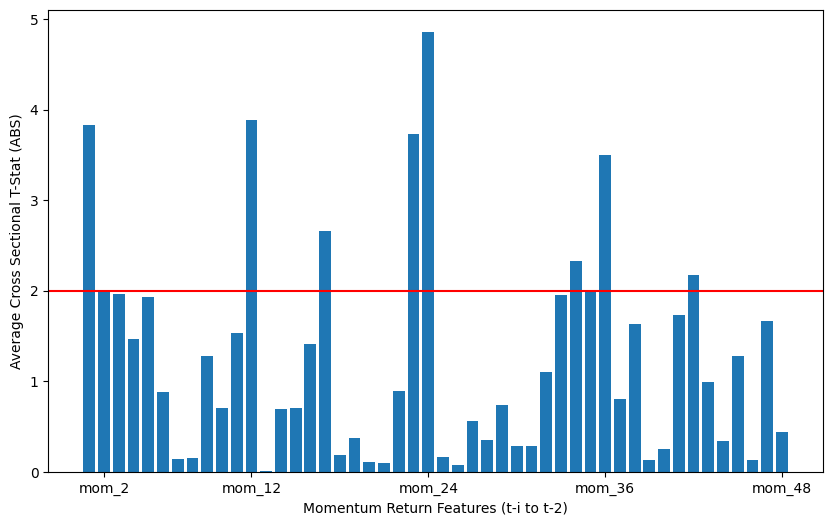

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(x=fama_macbeth_summary.index, height=abs(fama_macbeth_summary['t_stat']))
plt.ylabel("Average Cross Sectional T-Stat (ABS)")
plt.xlabel("Momentum Return Features (t-i to t-2)")
plt.xticks(ticks=[1,11,23,35,47])
plt.axhline(y=2, color='red', linestyle='-')
plt.show()